# Day - 1: Pandas Foundation

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../Datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Thoughts about the Dataset
1. The dataset is about the pasangers travelled in the titanic ship. It shows when crash happenned how many survived and how many died.
2. The dataset contains 891 rows and 12 columns.
3. The Columns Age-177, Cabin-687, Embarked-2 have the missing values.
4. The Target column is Survived.

# Day - 2 : Exploratory Data Analysis (EDA)

In [12]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [15]:
pd.crosstab(df['Sex'],df["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [16]:
pd.crosstab(df['Sex'], df['Survived'], normalize = "index")

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [17]:
pd.crosstab(df['Pclass'],df['Survived'],normalize = 'index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


## Basic Plots

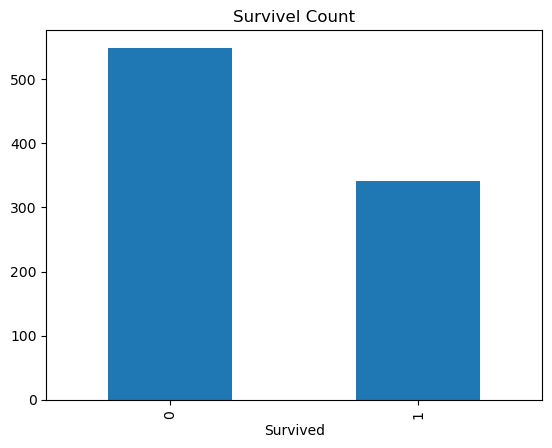

In [19]:
import matplotlib.pyplot as plt

df['Survived'].value_counts().plot(kind = 'bar')
plt.title("Survivel Count")
plt.show()

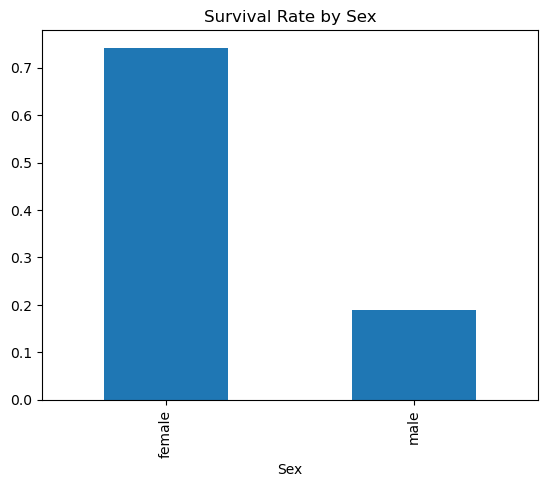

In [20]:
df.groupby("Sex")['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Sex')
plt.show()

# Day 3: Missing values

In [22]:
df.isnull().mean().sort_values(ascending = False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

### Decision Making
1. In the Cabin feature 77% value missing so we can drop the Column or if we want we can transform NaN and fill the values desired values and then we can use it.
2. Like Age and Embarked features Filling will be usefull

<Axes: >

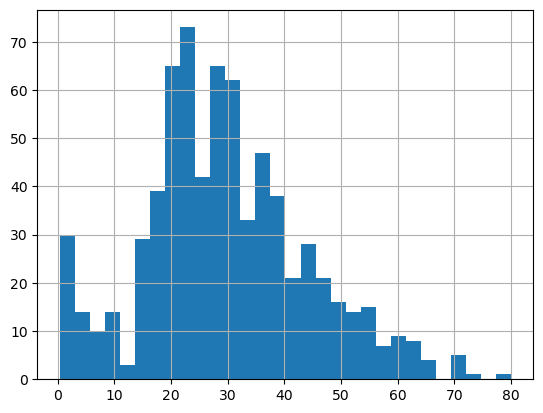

In [24]:
df["Age"].hist(bins =30)

In [25]:
df.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

# Day 4: Data Cleaning

In [27]:
#step1: Drop Cabin Column
df.drop(columns = ['Cabin'],inplace= True)

In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [29]:
#step2: Impute Age
df['Age']=df['Age'].fillna(df['Age'].mean())


In [30]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [31]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [32]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Day 4: Markdown
1. Dropped Cabin column.
2. Filled Age column with mean() because its numerical and had less missing values predictive feature
3. Age is a numerical feature with moderate missing values and potential predictive importance, so mean imputation is a reasonable initial approach.


# Day 5: Feature Encoding

In [35]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

### Binary Encoding

In [37]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [38]:
df['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

### One-Hot Encoding

In [40]:
df = pd.get_dummies(df, columns = ['Embarked'], drop_first = True)

In [41]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(2)
memory usage: 71.5+ KB


In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


### Q&A
1. Why ML models can't use text?

    Ans: ML models are Mathmetical Machines

2. Why *Sex* used mapping?
  
    Ans: Because *map* function is a loop. It will search each entry and confirm and executes the values.

3. Why *Embarked* used one-hot encoding?

    Ans: *Embarked* feature has three different categories, so Binary not possible.
   

# Day 6: First ML Model (Historic Moment)

In [46]:
#step1: Drop Unused columns
df_model= df.drop(columns = ['Name', 'Ticket'])
df_model.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [47]:
#step 2: Split features and target
X = df_model.drop("Survived", axis = 1)
y = df_model["Survived"]

In [48]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,38.0,1,0,71.2833,False,False
2,3,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,35.0,1,0,53.1000,False,True
4,5,3,0,35.0,0,0,8.0500,False,True


In [49]:
#step 3: Train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state = 42
)

In [50]:
#step 4: Train Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
model

LogisticRegression(max_iter=1000)

In [51]:
#step 5: Evaluate
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)

print(
    f"The accuracy score is {score:.03f}"
)

The accuracy score is 0.804


## Reflect
1. Is Accuracy good or bad?
   Ans: its 0.804 percentage accurate good.
2. Which feature do expect to matter?
   Ans: 

In [53]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
709,710,3,0,29.699118,1,1,15.2458,False,False
439,440,2,0,31.000000,0,0,10.5000,False,True
840,841,3,0,20.000000,0,0,7.9250,False,True
720,721,2,1,6.000000,0,1,33.0000,False,True
39,40,3,1,14.000000,1,0,11.2417,False,False


In [54]:
#Identify Strongest features from result
pd.Series(model.coef_[0], index = X.columns).sort_values()

Pclass        -0.934034
Embarked_S    -0.406614
SibSp         -0.289134
Parch         -0.121566
Embarked_Q    -0.092888
Age           -0.031253
PassengerId    0.000354
Fare           0.002603
Sex            2.606760
dtype: float64

In [55]:
dataset = df.drop(columns=['PassengerId', 'Name', 'Ticket'])
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [56]:
X = dataset.drop(columns = ['Survived'])
y = dataset['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,False,False
2,3,1,26.0,0,0,7.9250,False,True
3,1,1,35.0,1,0,53.1000,False,True
4,3,0,35.0,0,0,8.0500,False,True


In [57]:
#train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state = 42
)

In [58]:
#train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
model

LogisticRegression(max_iter=1000)

In [59]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.8100558659217877

In [60]:
pd.Series(model.coef_[0], index=X.columns).sort_values()


Pclass       -0.942433
Embarked_S   -0.403891
SibSp        -0.296988
Parch        -0.112133
Embarked_Q   -0.091660
Age          -0.031434
Fare          0.002540
Sex           2.591285
dtype: float64

In [61]:
import numpy as np

odds_ratios = np.exp(model.coef_[0])
pd.Series(odds_ratios, index=X.columns).sort_values()


Pclass         0.389679
Embarked_S     0.667717
SibSp          0.743053
Parch          0.893926
Embarked_Q     0.912415
Age            0.969055
Fare           1.002543
Sex           13.346917
dtype: float64

In [62]:
model.predict_proba(X_test.iloc[[0]])
X_test.iloc[0]


Pclass                3
Sex                   0
Age           29.699118
SibSp                 1
Parch                 1
Fare            15.2458
Embarked_Q        False
Embarked_S        False
Name: 709, dtype: object

# Day 7: Confusion Matrix & Why Accuracy Can Lie

In [64]:
#Step1: Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[90, 15],
       [19, 55]], dtype=int64)

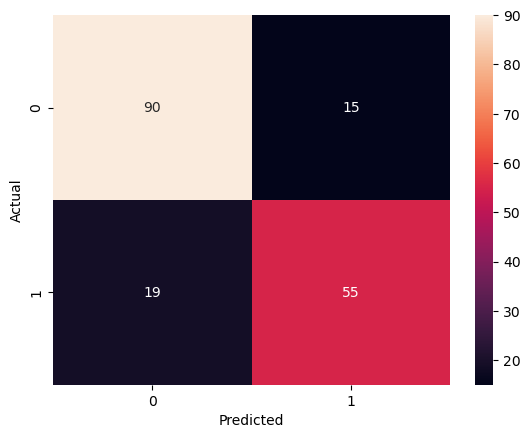

In [65]:
#step 2: Visualize it 
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
#Step 3: Precision, Recall, F1
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [67]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# Day 8: Scaling + Regularization + Cross Validation


In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

import numpy as np


In [126]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [132]:
X_scaled.shape == X.shape

True

In [140]:
#Step 3 — Logistic Regression with Regularization
c_values = [0.1,1,5,10]

for c in c_values:
    model=LogisticRegression(C=c, max_iter = 200)
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print("C = ",c, "--> CV Accuracy:", np.mean(scores))

C =  0.1 --> CV Accuracy: 0.791256041679744
C =  1 --> CV Accuracy: 0.7867679367271359
C =  5 --> CV Accuracy: 0.7867679367271359
C =  10 --> CV Accuracy: 0.7867679367271359


In [142]:
best_c = 0.1
final_model = LogisticRegression(C= best_c, max_iter = 200)
final_model.fit(X_scaled, y)

print("Model trained with C =", best_c)

Model trained with C = 0.1


# Day 9 Plan (Feature Power Boost 🚀)

In [145]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


In [147]:
X = df[['Pclass','Sex','Age','Fare','Embarked_Q','Embarked_S','FamilySize','IsAlone']]
X.head()

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,3,0,22.0,7.2500,False,True,2,0
1,1,1,38.0,71.2833,False,False,2,0
2,3,1,26.0,7.9250,False,True,1,1
3,1,1,35.0,53.1000,False,True,2,0
4,3,0,35.0,8.0500,False,True,1,1


In [149]:
X_scaled1 = scaler.fit_transform(X)

In [151]:
c_values = [0.1,1,5,10]

for c in c_values:
    model=LogisticRegression(C=c, max_iter = 200)
    scores = cross_val_score(model, X_scaled1, y, cv=5)
    print("C = ",c, "--> CV Accuracy:", np.mean(scores))

C =  0.1 --> CV Accuracy: 0.7968802962776975
C =  1 --> CV Accuracy: 0.7968865733475613
C =  5 --> CV Accuracy: 0.7957629778419434
C =  10 --> CV Accuracy: 0.7957629778419434


In [153]:
best_c = 1
final_model = LogisticRegression(C = best_c, max_iter =200)
final_model.fit(X_scaled1,y)

LogisticRegression(C=1, max_iter=200)

In [157]:
scores = cross_val_score(final_model, X_scaled1, y, cv=5)
print("C = ",best_c, "--> CV Accuracy:", np.mean(scores))

C =  1 --> CV Accuracy: 0.7968865733475613


# Day 10 — Try Tree-Based Models

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

In [164]:
#Decision Tree
dt_model = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dt_score = cross_val_score(dt_model, X,y, cv=5)
print("Decision Tree CV Accuracy:", np.mean(dt_score))

Decision Tree CV Accuracy: 0.8170610758897746


In [166]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_scores=cross_val_score(rf_model, X,y, cv = 5)
print('Random Forest CV Accuracy:', np.mean(rf_scores))

Random Forest CV Accuracy: 0.8047705730964786


# Day 11 Plan — Optimize Random Forest

In [170]:
depths = [4,6,8,10]
estimators = [50,100,200]

for d in depths:
    for n in estimators:
        rf_model = RandomForestClassifier(max_depth = d, n_estimators = n, random_state = 42)
        scores = cross_val_score(rf_model, X,y,cv = 5)
        print("Depth:",d, "Trees:", n, "--> CV Accuracy:", np.mean(scores))

Depth: 4 Trees: 50 --> CV Accuracy: 0.8103822735547046
Depth: 4 Trees: 100 --> CV Accuracy: 0.8114995919904588
Depth: 4 Trees: 200 --> CV Accuracy: 0.8215868432615656
Depth: 6 Trees: 50 --> CV Accuracy: 0.819327098110602
Depth: 6 Trees: 100 --> CV Accuracy: 0.8148578243675851
Depth: 6 Trees: 200 --> CV Accuracy: 0.8182286108844392
Depth: 8 Trees: 50 --> CV Accuracy: 0.8260686711443098
Depth: 8 Trees: 100 --> CV Accuracy: 0.827185989580064
Depth: 8 Trees: 200 --> CV Accuracy: 0.8226916075575922
Depth: 10 Trees: 50 --> CV Accuracy: 0.8283158621555458
Depth: 10 Trees: 100 --> CV Accuracy: 0.8171050153788212
Depth: 10 Trees: 200 --> CV Accuracy: 0.8182223338145753


In [172]:
final_rf = RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)
final_rf.fit(X, y)
print("Final Model Ready! 🎯")


Final Model Ready! 🎯


# Day 12 — Feature Importance

<Axes: title={'center': 'Feature Importance'}>

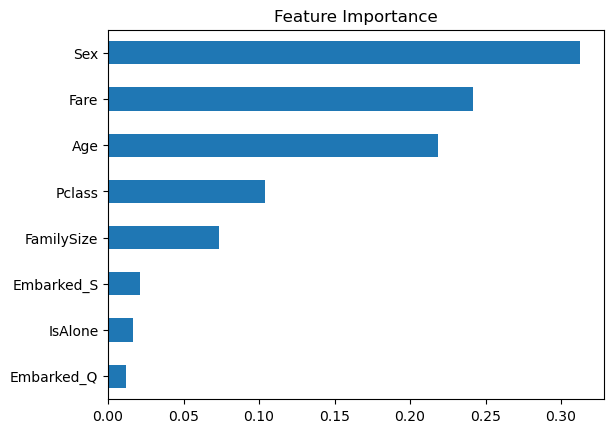

In [175]:
import pandas as pd
feat_importances = pd.Series(final_rf.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh', title="Feature Importance")


# Day 13: Evaluation Beyond Accuracy

In [179]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

y_pred = final_rf.predict(X)

print('Confusion Matrix:\n', confusion_matrix(y,y_pred))
print("\nClassifiction Report:\n", classification_report(y,y_pred))
print("ROC-AUC Score:", roc_auc_score(y, final_rf.predict_proba(X)[:,1]))

Confusion Matrix:
 [[538  11]
 [ 36 306]]

Classifiction Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       549
           1       0.97      0.89      0.93       342

    accuracy                           0.95       891
   macro avg       0.95      0.94      0.94       891
weighted avg       0.95      0.95      0.95       891

ROC-AUC Score: 0.9857982083320018
